In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

In [2]:
class EDA:

    def __init__(self, data):

        self.data = data
        self.number_columns = self.data.select_dtypes(include=['number']).columns
        self.object_columns = self.data.select_dtypes(include=['object']).columns
        self.numeric_data = self.data[self.number_columns]
        self.categorical_data = self.data[self.object_columns]
        self.n_cols = 4
        self.target_column = 'Credit_Score'

        # ----------

        sns.set(style="whitegrid")
        sns.set_palette("pastel")

    # ------------------------------

    def validate_data(self, data):

        if data.empty:
            raise ValueError("DataFrame must be not empty.")

    # ------------------------------

    def data_summary(self):

        try:
            print("\nHead:")
            print(self.data.head(5))

            print("\nTail:")
            print(self.data.tail(5))

            print("\nShape:")
            print(self.data.shape)

            print("\nColumns:")
            print(len(self.data.columns))
            print(self.data.columns)

            print("\nData Types:")
            print(self.data.dtypes)

            print("\nNumeric columns:")
            print(len(self.number_columns))
            print(self.number_columns)

            print("\nObject columns:")
            print(len(self.object_columns))
            print(self.object_columns)

            print("\nUnique values:")
            for col in self.data.columns:
                unique_values = self.data[col].nunique()
                print(f"{col}: {unique_values}")

                if unique_values < 20:
                    print(f"Labels in {col}: {sorted(self.data[col].unique())}")

            print("\nInformation:")
            print(self.data.info())

            print("\nDescribe:")
            print(self.data.describe())

            print("\nMissing values:")
            print(self.data.isnull().sum())

            print("\nOutliers:")
            for col in self.number_columns:
                if self.data[col].dtype in ['int64', 'float64']:
                    z_scores = np.abs(stats.zscore(self.data[col].dropna()))
                    print(f"Outliers in {col}: {np.where(z_scores > 3)}")
    
        except Exception as e:
            print(f"Error during the data summary: {e}")

    # ------------------------------

    def data_statistics(self):

        try:
            print("\nMean:")
            print(self.numeric_data.mean())

            print("\nMean:")
            print(self.numeric_data.mean())

            print("\nMedian:")
            print(self.numeric_data.median())

            print("\nMode:")
            print(self.numeric_data.mode().iloc[0])

            print("\nMinimum:")
            print(self.numeric_data.min())

            print("\nMaximum:")
            print(self.numeric_data.max())

            print("\nVariance:")
            print(self.numeric_data.var())

            print("\nStandard Deviation:")
            print(self.numeric_data.std())

        except Exception as e:
            print(f"Error during the data statistics: {e}")

    # ------------------------------

    def setup_subplots(self, data_columns, plot_type, title_prefix, hue=None, anaysis=None):

        n_rows = (len(data_columns) + self.n_cols - 1) // self.n_cols

        if n_rows == 0:
            print("No rows to plot.")
            return
    
        fig, axs = plt.subplots(n_rows, self.n_cols, figsize=(self.n_cols * 5, n_rows * 5))

        for i, col in enumerate(data_columns):
            ax = axs[i // self.n_cols, i % self.n_cols]

            if plot_type == 'hist':
                sns.histplot(self.data[col], bins=30, kde=True, ax=ax, color='skyblue')
            
            elif plot_type == 'box':
                sns.boxplot(x=self.data[col], ax=ax, color='lightgreen')
            
            elif plot_type == 'count':
                if anaysis == 'yes':
                    sns.countplot(x=col, data=self.data, ax=ax, hue=hue, palette='viridis', legend=False)

                else:
                    sns.countplot(x=col, data=self.data, ax=ax, hue=self.data[col], palette='viridis', legend=False)

            elif plot_type == 'violin':
                sns.violinplot(x=self.target_column, y=self.data[col], data=self.data, ax=ax, palette='pastel', hue=self.target_column)

            ax.set_title(f'{title_prefix} {col}', fontsize=14)
            ax.set_xlabel('')
            ax.set_ylabel('Count' if plot_type == 'count' else 'Value')

        for j in range(i + 1, n_rows * self.n_cols):
            fig.delaxes(axs[j // self.n_cols, j % self.n_cols])

        plt.tight_layout()
        plt.show()

    # ------------------------------

    def plot_count_plots(self):

        filtered_object_columns = [col for col in self.object_columns if self.data[col].nunique() < 20]
        self.setup_subplots(filtered_object_columns, 'count', 'Count of')

    # ------------------------------

    def plot_histograms(self):

        self.setup_subplots(self.number_columns, 'hist', 'Distribution of')

    # ------------------------------

    def plot_box_plots(self):

        self.setup_subplots(self.number_columns, 'box', 'Box plot of')

    # ------------------------------

    def plot_correlation_matrix(self):

        plt.figure(figsize=(12, 8))
        sns.heatmap(self.numeric_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
        plt.title('Correlation Matrix:', fontsize=16)
        plt.show()

    # ------------------------------

    def plot_histograms_bivariates(self):

        filtered_object_columns = [col for col in self.object_columns if col != self.target_column and self.data[col].nunique() < 20]

        self.setup_subplots(filtered_object_columns, 'count', f'{self.target_column} VS', self.target_column, 'yes')

    # ------------------------------

    def plot_violins(self):

        self.setup_subplots(self.number_columns, 'violin', f'{self.target_column} VS', self.target_column)

    # ------------------------------

    def perform_EDA(self):
        self.data_summary()
        self.data_statistics()
        self.plot_count_plots()
        self.plot_histograms()
        self.plot_box_plots()
        self.plot_correlation_matrix()
        self.plot_histograms_bivariates()
        self.plot_violins()

In [3]:
class DQR:

    def __init__(self, data):

        self.data = data

    # ------------------------------

    def preprocess_data(self):

        self.data = self.data.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan'])

    # ------------------------------

    def clean_incoherent_values(self):

        replacements = {
            'Occupation': {'_______': np.nan},
            'Credit_Mix': {'_': np.nan},
            'Payment_Behaviour': {'!@9#%8': np.nan}
        }
        self.data.replace(replacements, inplace=True)

        for key in replacements.keys():
            self.data[key] = self.data[key].fillna(self.data[key].mode().iloc[0])

    # ------------------------------

    def convert_time_to_numeric(self):

        if self.data['Credit_History_Age'].dtype != 'object':
            self.data['Credit_History_Age'] = self.data['Credit_History_Age'].astype(str)    

        years = self.data['Credit_History_Age'].str.extract(r'(\d+)\sYears').astype(float)
        months = self.data['Credit_History_Age'].str.extract(r'(\d+)\sMonths').astype(float)
        
        self.data['Credit_History_Age'] = years + (months / 12)

    # ------------------------------

    def clean_data_types(self):

        object_to_numeric_columns = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

        non_numeric_columns = self.data.columns[~self.data.columns.isin(object_to_numeric_columns)]

        for column in non_numeric_columns:
            if self.data[column].dtype == 'object':
                self.data[column] = self.data[column].str.replace('_', '')
                self.data[column] = pd.to_numeric(self.data[column], errors='coerce')

    # ------------------------------

    def handle_outliers(self):

        for col in self.data.select_dtypes(include=['number']).columns:
            Q1 = self.data[col].quantile(0.25)
            Q3 = self.data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            self.data[col] = np.where(self.data[col] < lower_bound, lower_bound, self.data[col])
            self.data[col] = np.where(self.data[col] > upper_bound, upper_bound, self.data[col])

    # ------------------------------

    def handle_missing_values(self):

        for column in self.data.columns:
            if self.data[column].dtype in ['float64', 'int64']:
                self.data[column] = self.data[column].fillna(self.data[column].median())

            elif self.data[column].dtype == 'object':
                self.data[column] = self.data[column].fillna(self.data[column].mode().iloc[0])
            
    # ------------------------------

    def encode_categorical(self):

        encoder = LabelEncoder()
        for column in self.data.select_dtypes(include=['object']).columns:
            self.data[column] = encoder.fit_transform(self.data[column].astype(str))

    def postprocess_data(self):

        int_columns = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']
        self.data[int_columns] = self.data[int_columns].astype('int')

        self.data = self.data.drop_duplicates()

    # ------------------------------

    def perform_clean(self):

        self.preprocess_data()
        self.clean_incoherent_values()
        self.convert_time_to_numeric()
        self.clean_data_types()
        self.handle_outliers()
        self.handle_missing_values()
        self.encode_categorical()
        self.postprocess_data()

        return self.data


Head:
       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0          

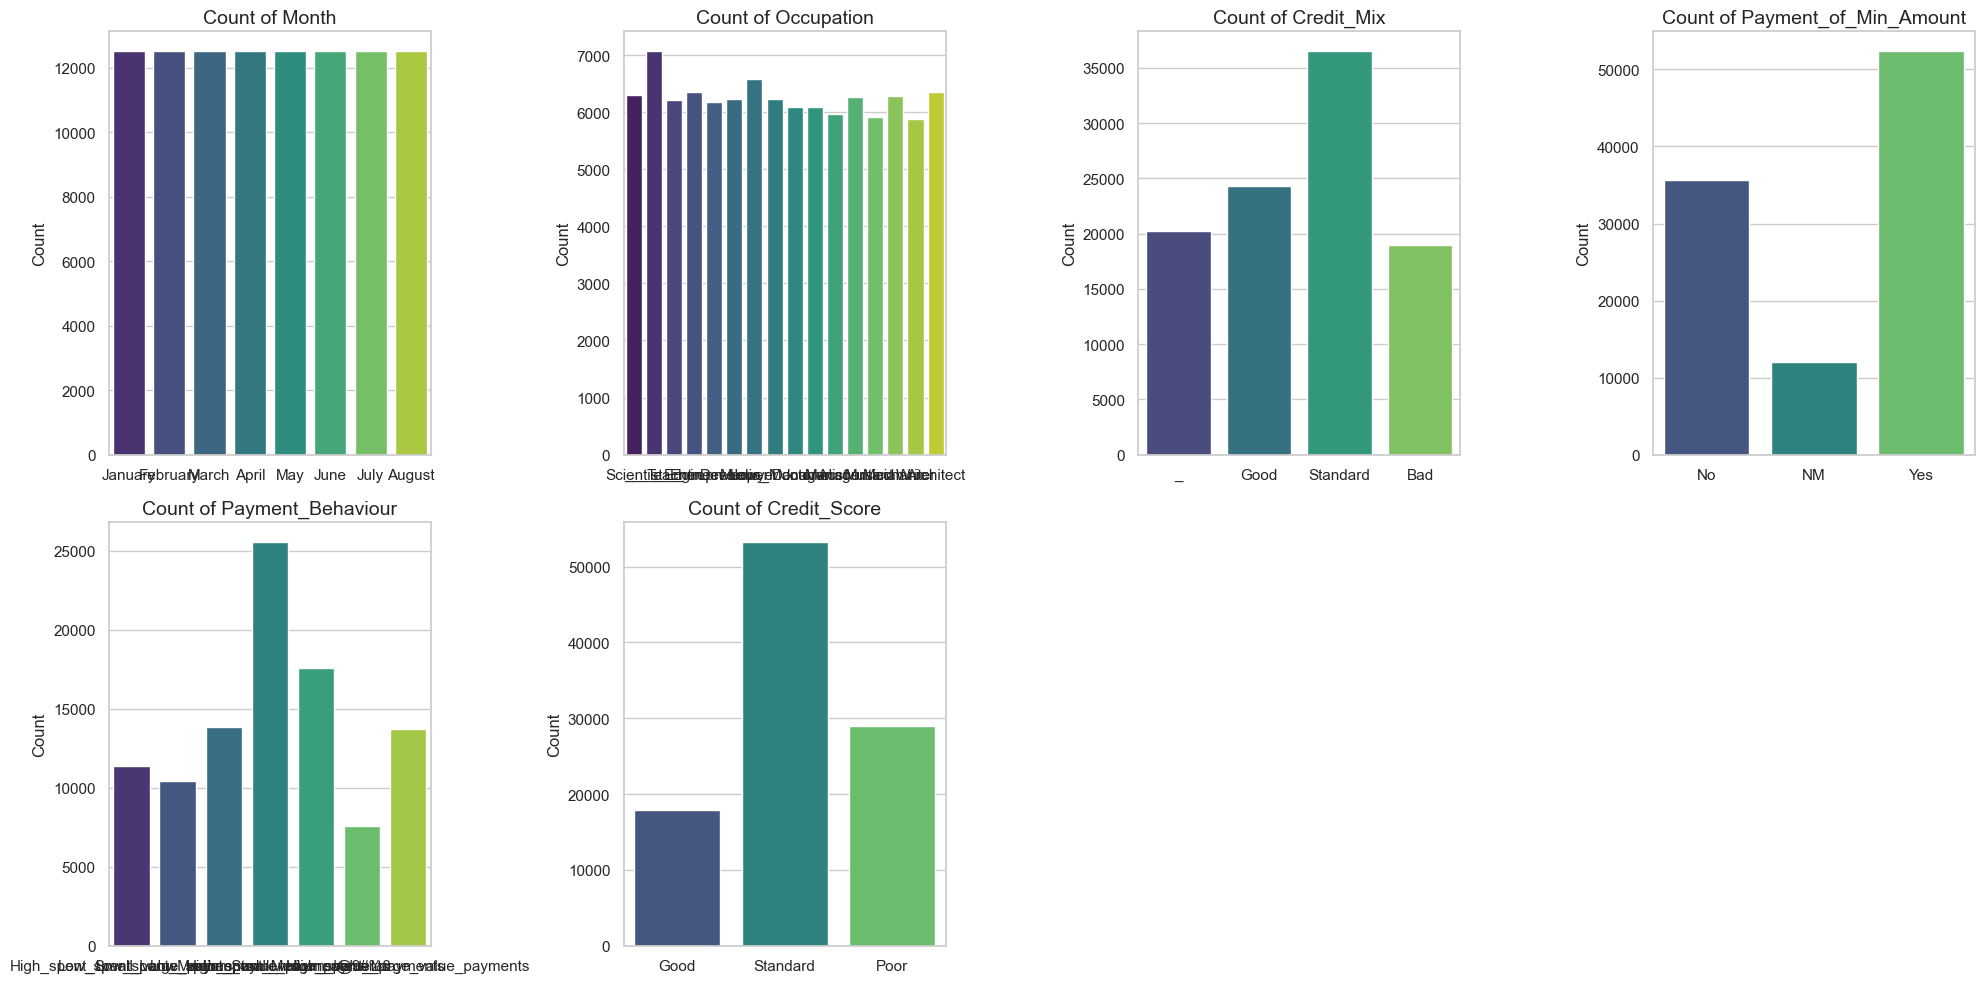

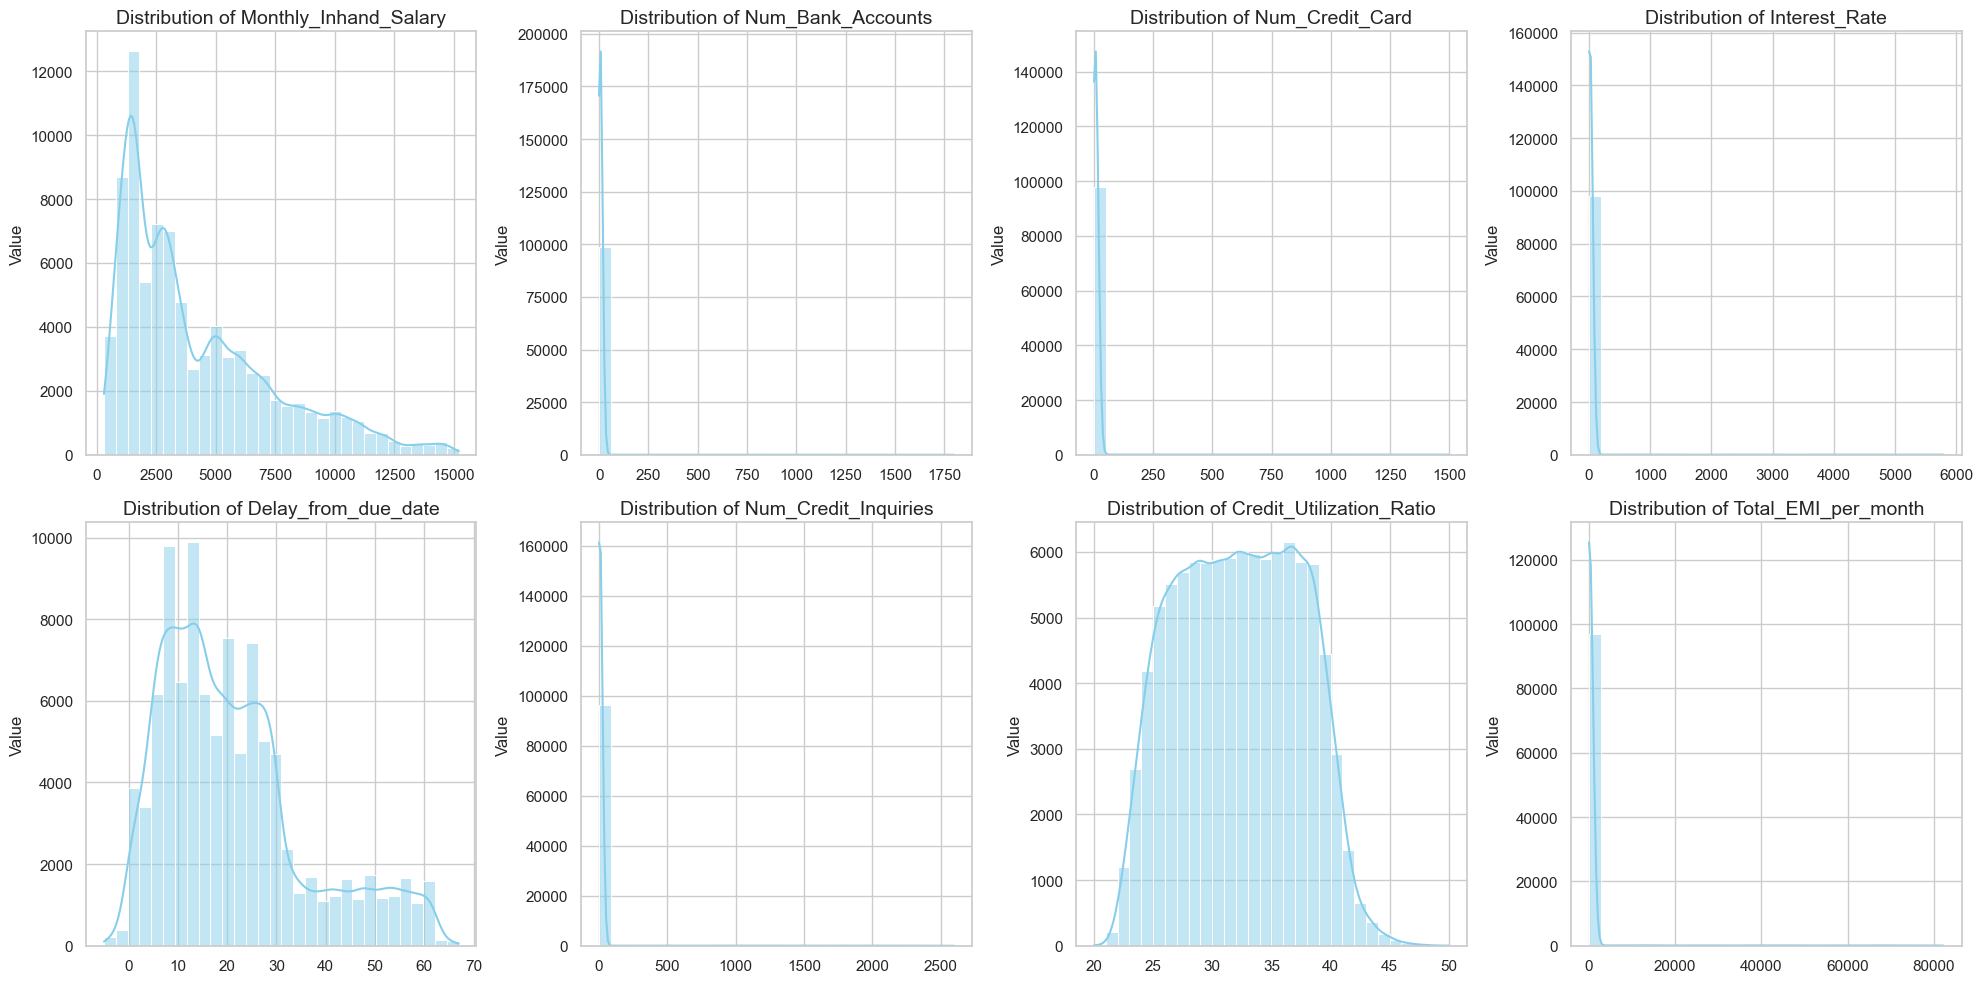

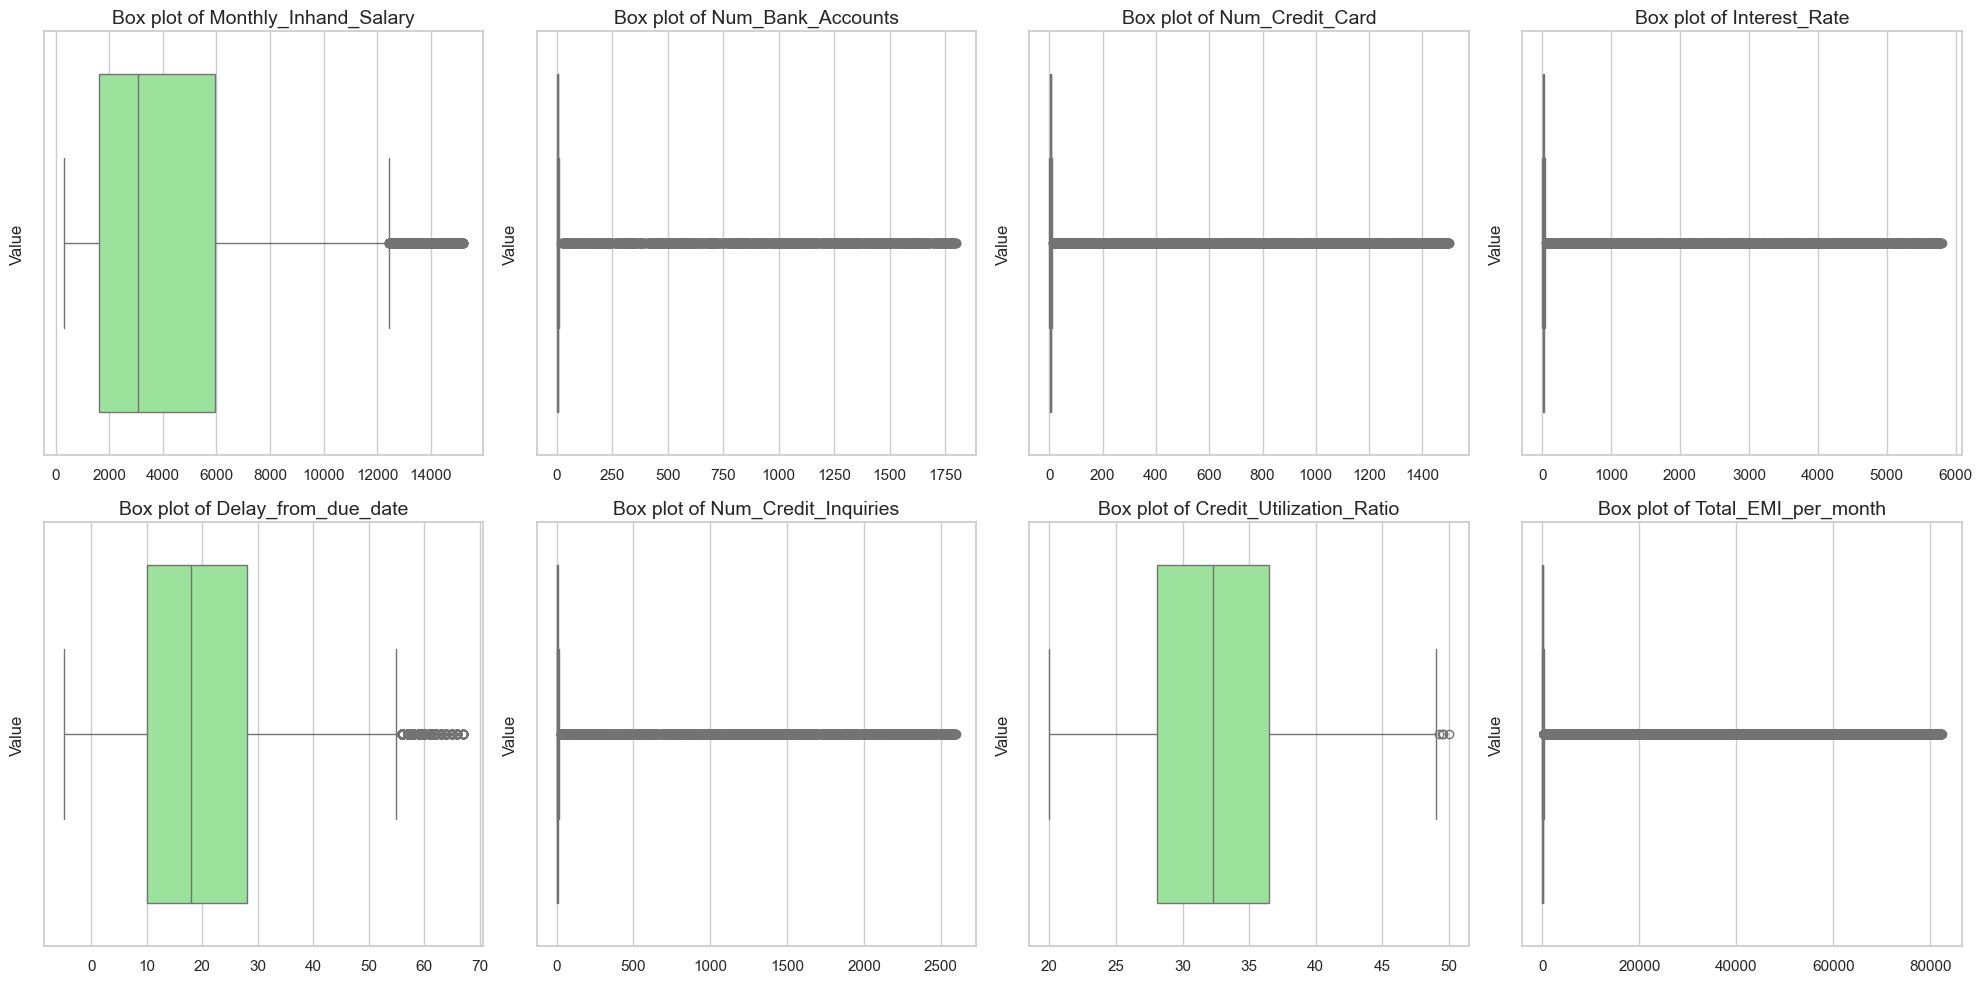

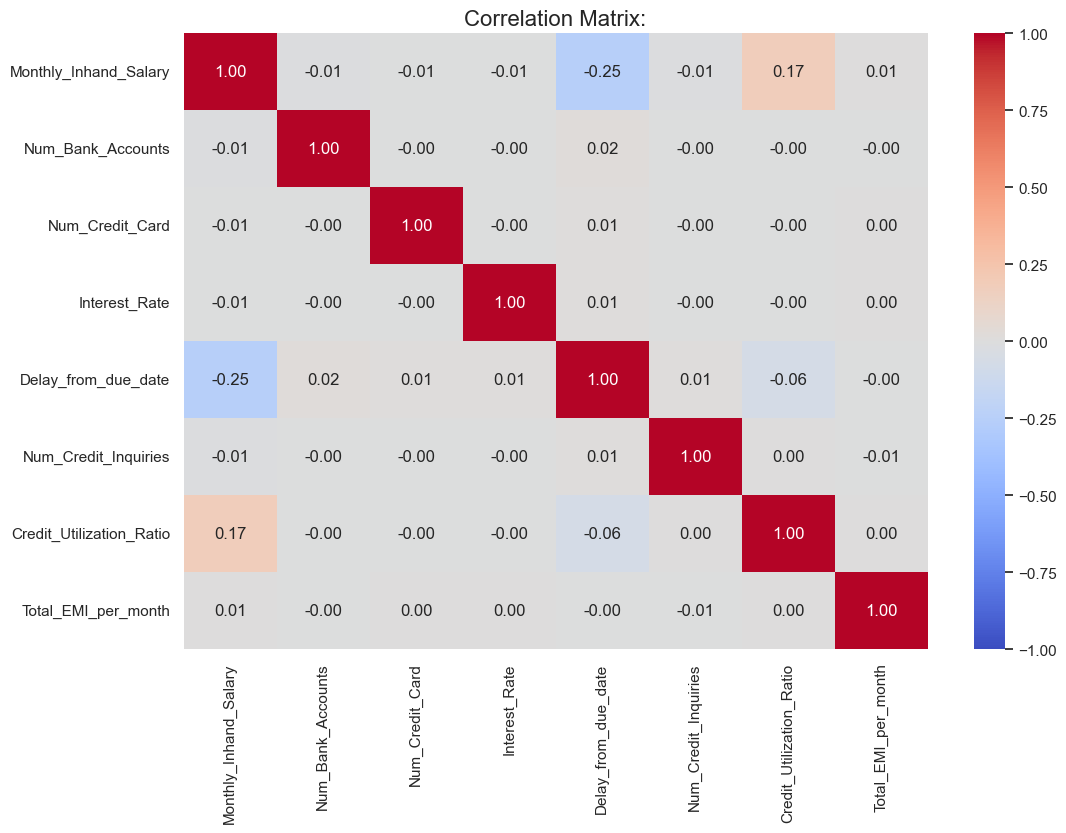

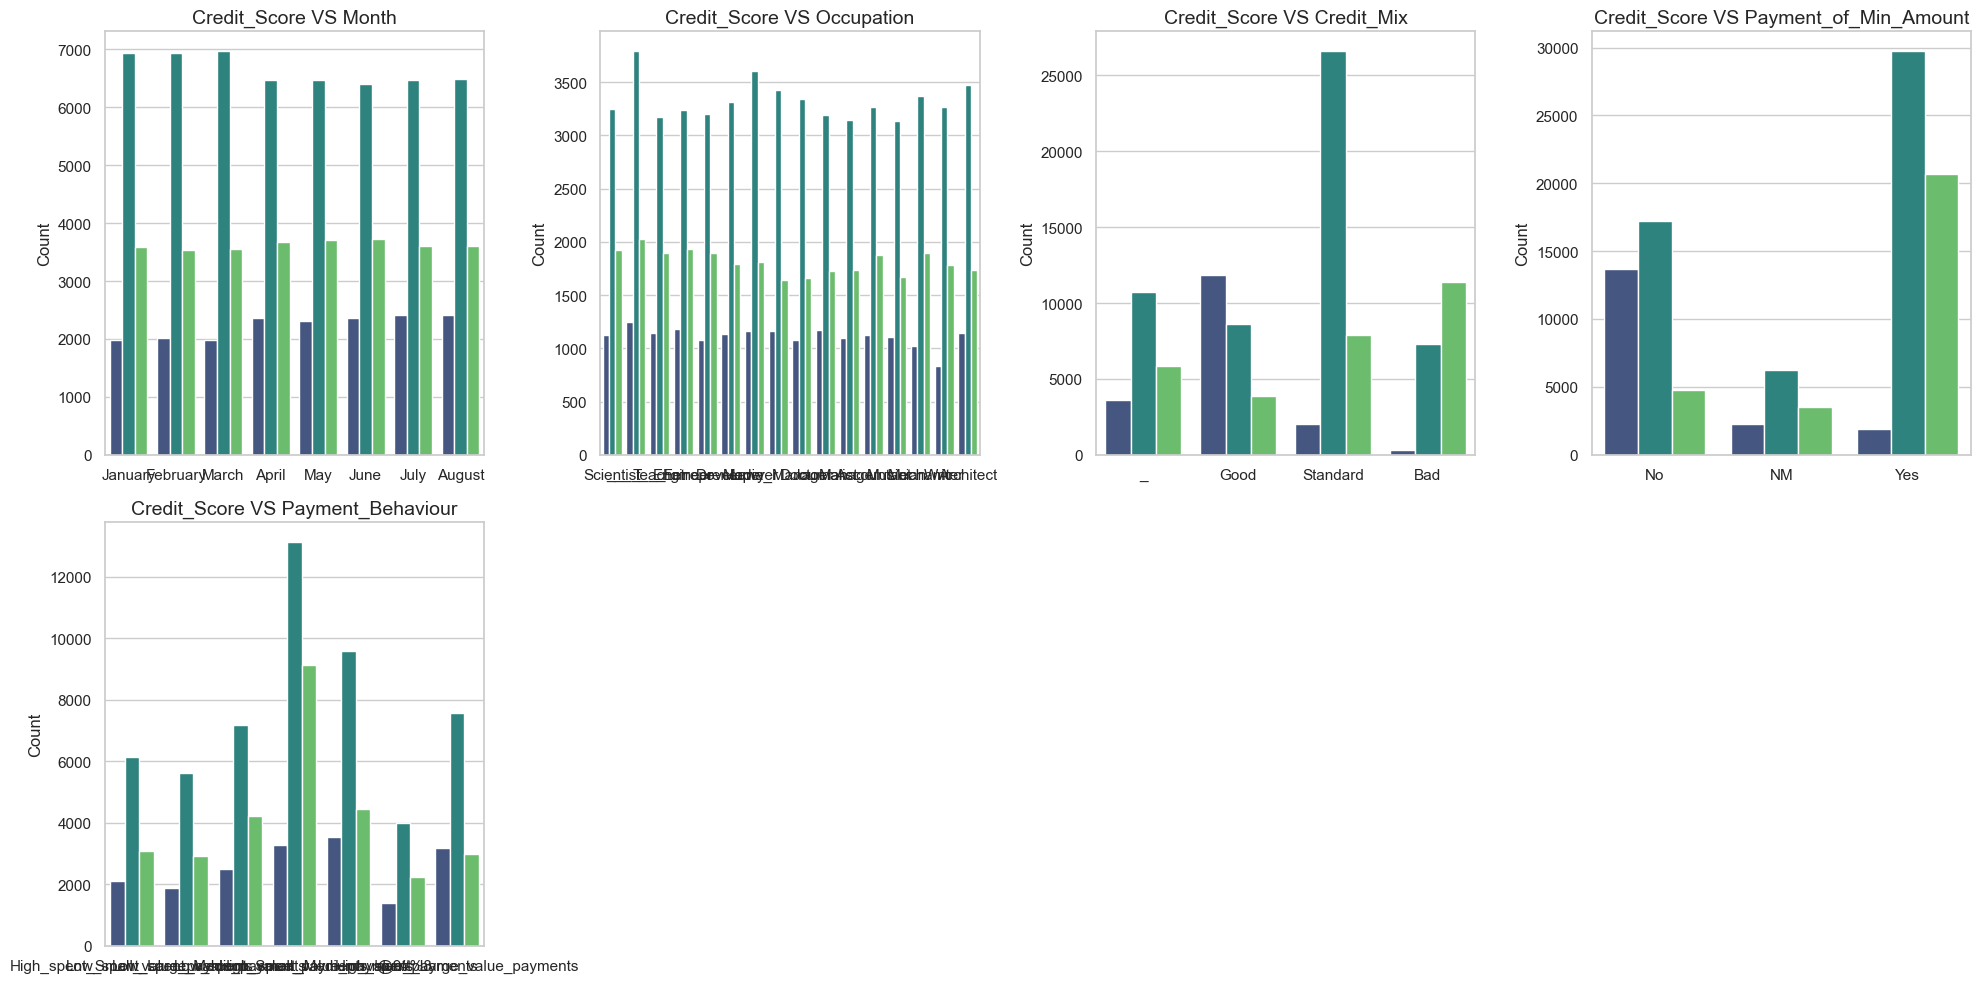

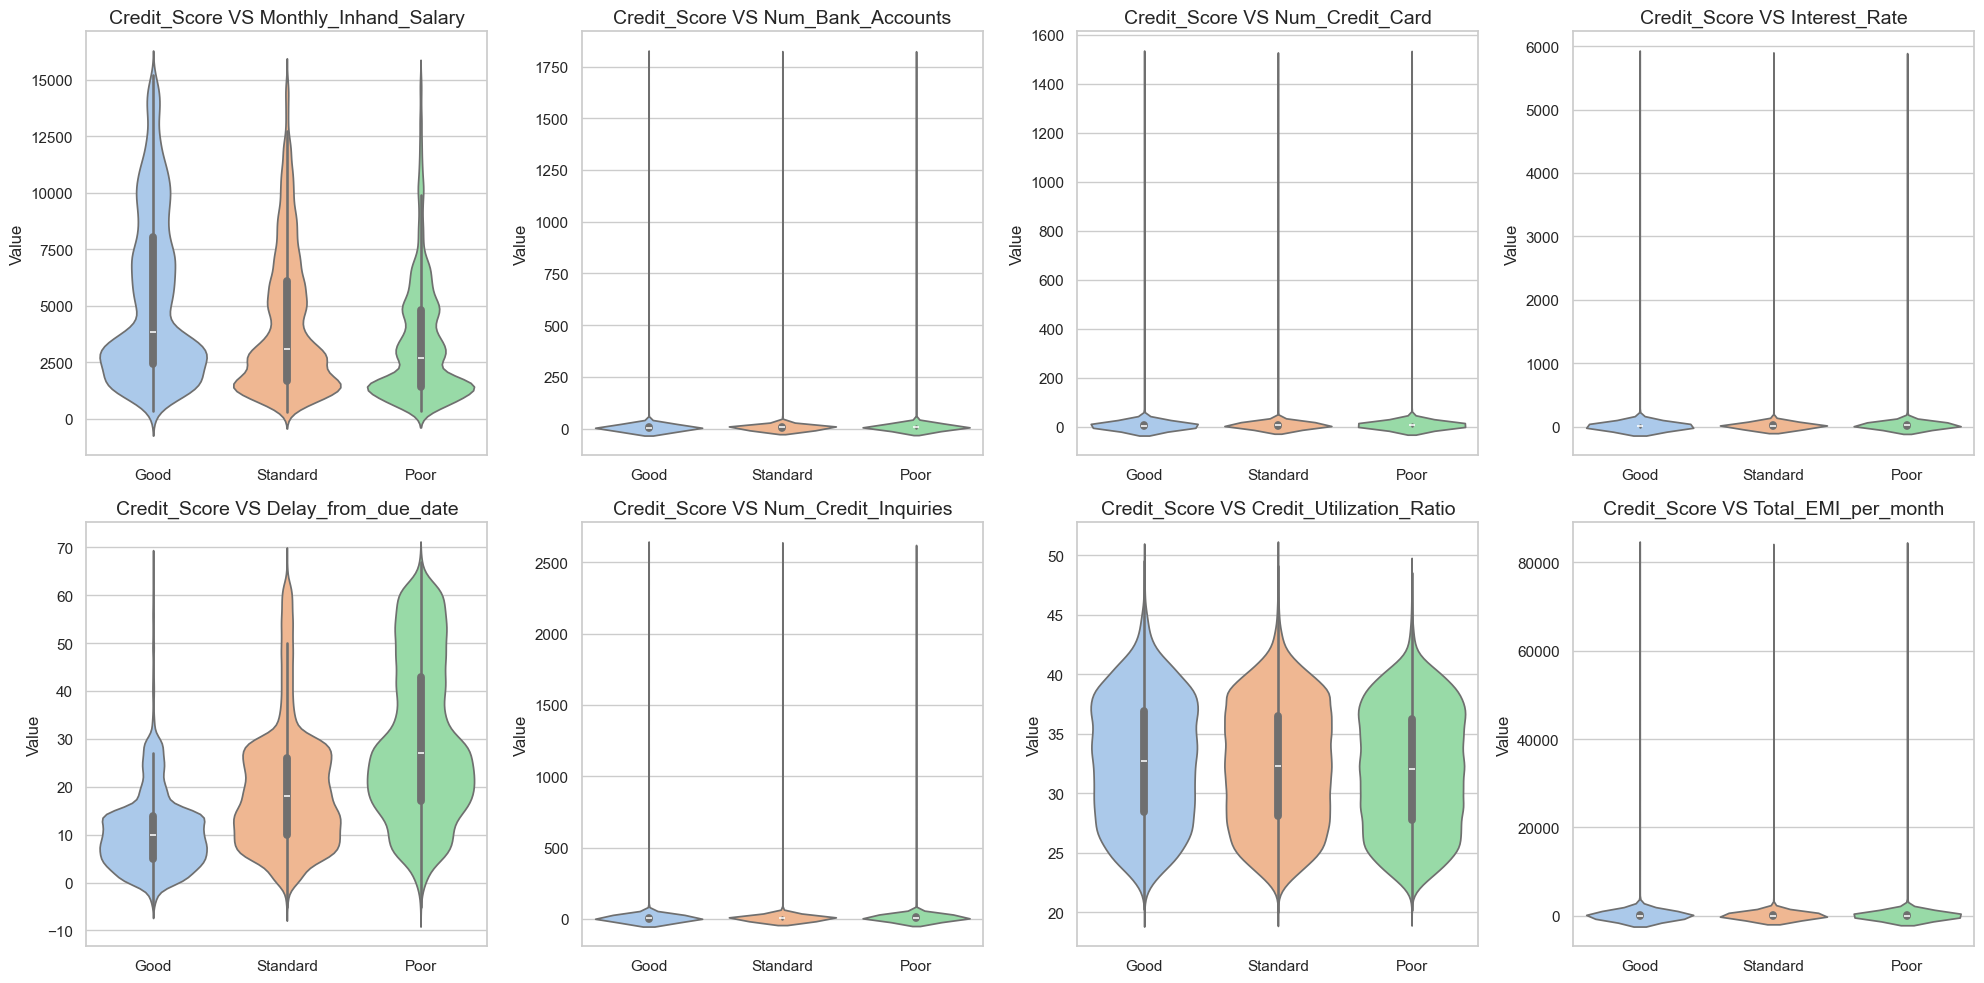

In [4]:
raw_data = pd.read_csv('Data/train-2.csv', low_memory=False)

#number_columns = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
#raw_data[number_columns] = raw_data[number_columns].apply(pd.to_numeric, errors='coerce')

#int_columns = ['Age', 'Num_of_Loan', 'Num_Credit_Inquiries']
#raw_data[int_columns] = raw_data[int_columns].astype('integer')

raw_EDA = EDA(raw_data)
raw_EDA.perform_EDA()

DQR = DQR(raw_data)
clean_data = DQR.perform_clean()

MANEJO DE VALORES INCOHERENTES (quitar valores "_______", "_" y "!@9#%8" por: media, moda, mediana, etc... ¿cuál propones? Explica): 
Occupation: _______
Credit_Mix: _
Payment_Behaviour: !@9#%8

MANEJO DE CONVERSIÓN DE VALOR STRING A NÚMERO (reemplazar este tipo de valores: "22 Years and 1 Months" a su equivalencia numérica: "22.0833333")
Credit_History_Age: 22 Years and 1 Months

MANEJO DE TIPO DE DATO DE COLUMNAS (quitar guión bajo de valores, por ejemplo: "8_"): 
Age
Annual_Income
Num_of_Loan
Num_of_Delayed_Payment
Changed_Credit_Limit
New_Credit_Inquiries
Outstanding_Debt
Amount_invested_monthly
Monthly_Balance

MANEJO DE VALORES AÍPICOS (reemplazar valores atípicos por: media, moda, mediana, etc... ¿cuál propones? Explica):
Age: MIN -500 / MAX 8698
Num_Bank_Accounts: MIN -1 / MAX 1798
Num_Credit_Card: MAX 1499
Interest Rate: MAX 5797
Num_of_Loan: MIN -100 / MAX 1496
Delay_from_due_date: MIN -5
Num_of_Delayed_Payment: MIN -3 / MAX 4397
Changed_Credit_Limit: MIN -6
Num_Credit_Inquiries: MAX 2597
Total_EMI_per_month: MAX 82331

MANEJO DE VALORES NULOS/VACÍOS (reemplazar valores "nan" por: media, moda, mediana, etc... ¿cuál propones? Explica):
Age
Annual_Income
Monthly_Inhand_Salary
Num_of_Loan
Num_of_Delayed_Payment
Changed_Credit_Limit
Num_Credit_Inquiries
Outstanding_Debt
Credit_History_Age
Amount_invested_monthly
Monthly_Balance

NUMERACIÓN DE VALORES (a partir del 0 hasta el número que sea necesario según la cantidad de valores en las columnas, por ejemplo, para "Month": del 0 al 8 para january al August)
Month: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Occupation: ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Credit_Mix: ['_' 'Good' 'Standard' 'Bad']
Payment_of_Min_Amount: ['No' 'NM' 'Yes']
Payment_Behaviour: ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']
Credit_Score: ['Good' 'Standard' 'Poor']


Head:
   Month  Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      3   23          12       19114.12            1824.843333   
1      2   23          12       19114.12            3093.745000   
2      6   -3          12       19114.12            3093.745000   
3      0   23          12       19114.12            3093.745000   
4      7   23          12       19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                  3                4            3.0            4   
1                  3                4            3.0            4   
2                  3                4            3.0            4   
3                  3                4            3.0            4   
4                  3                4            3.0            4   

   Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
0                    3                       7                 11.27   
1                   -1         

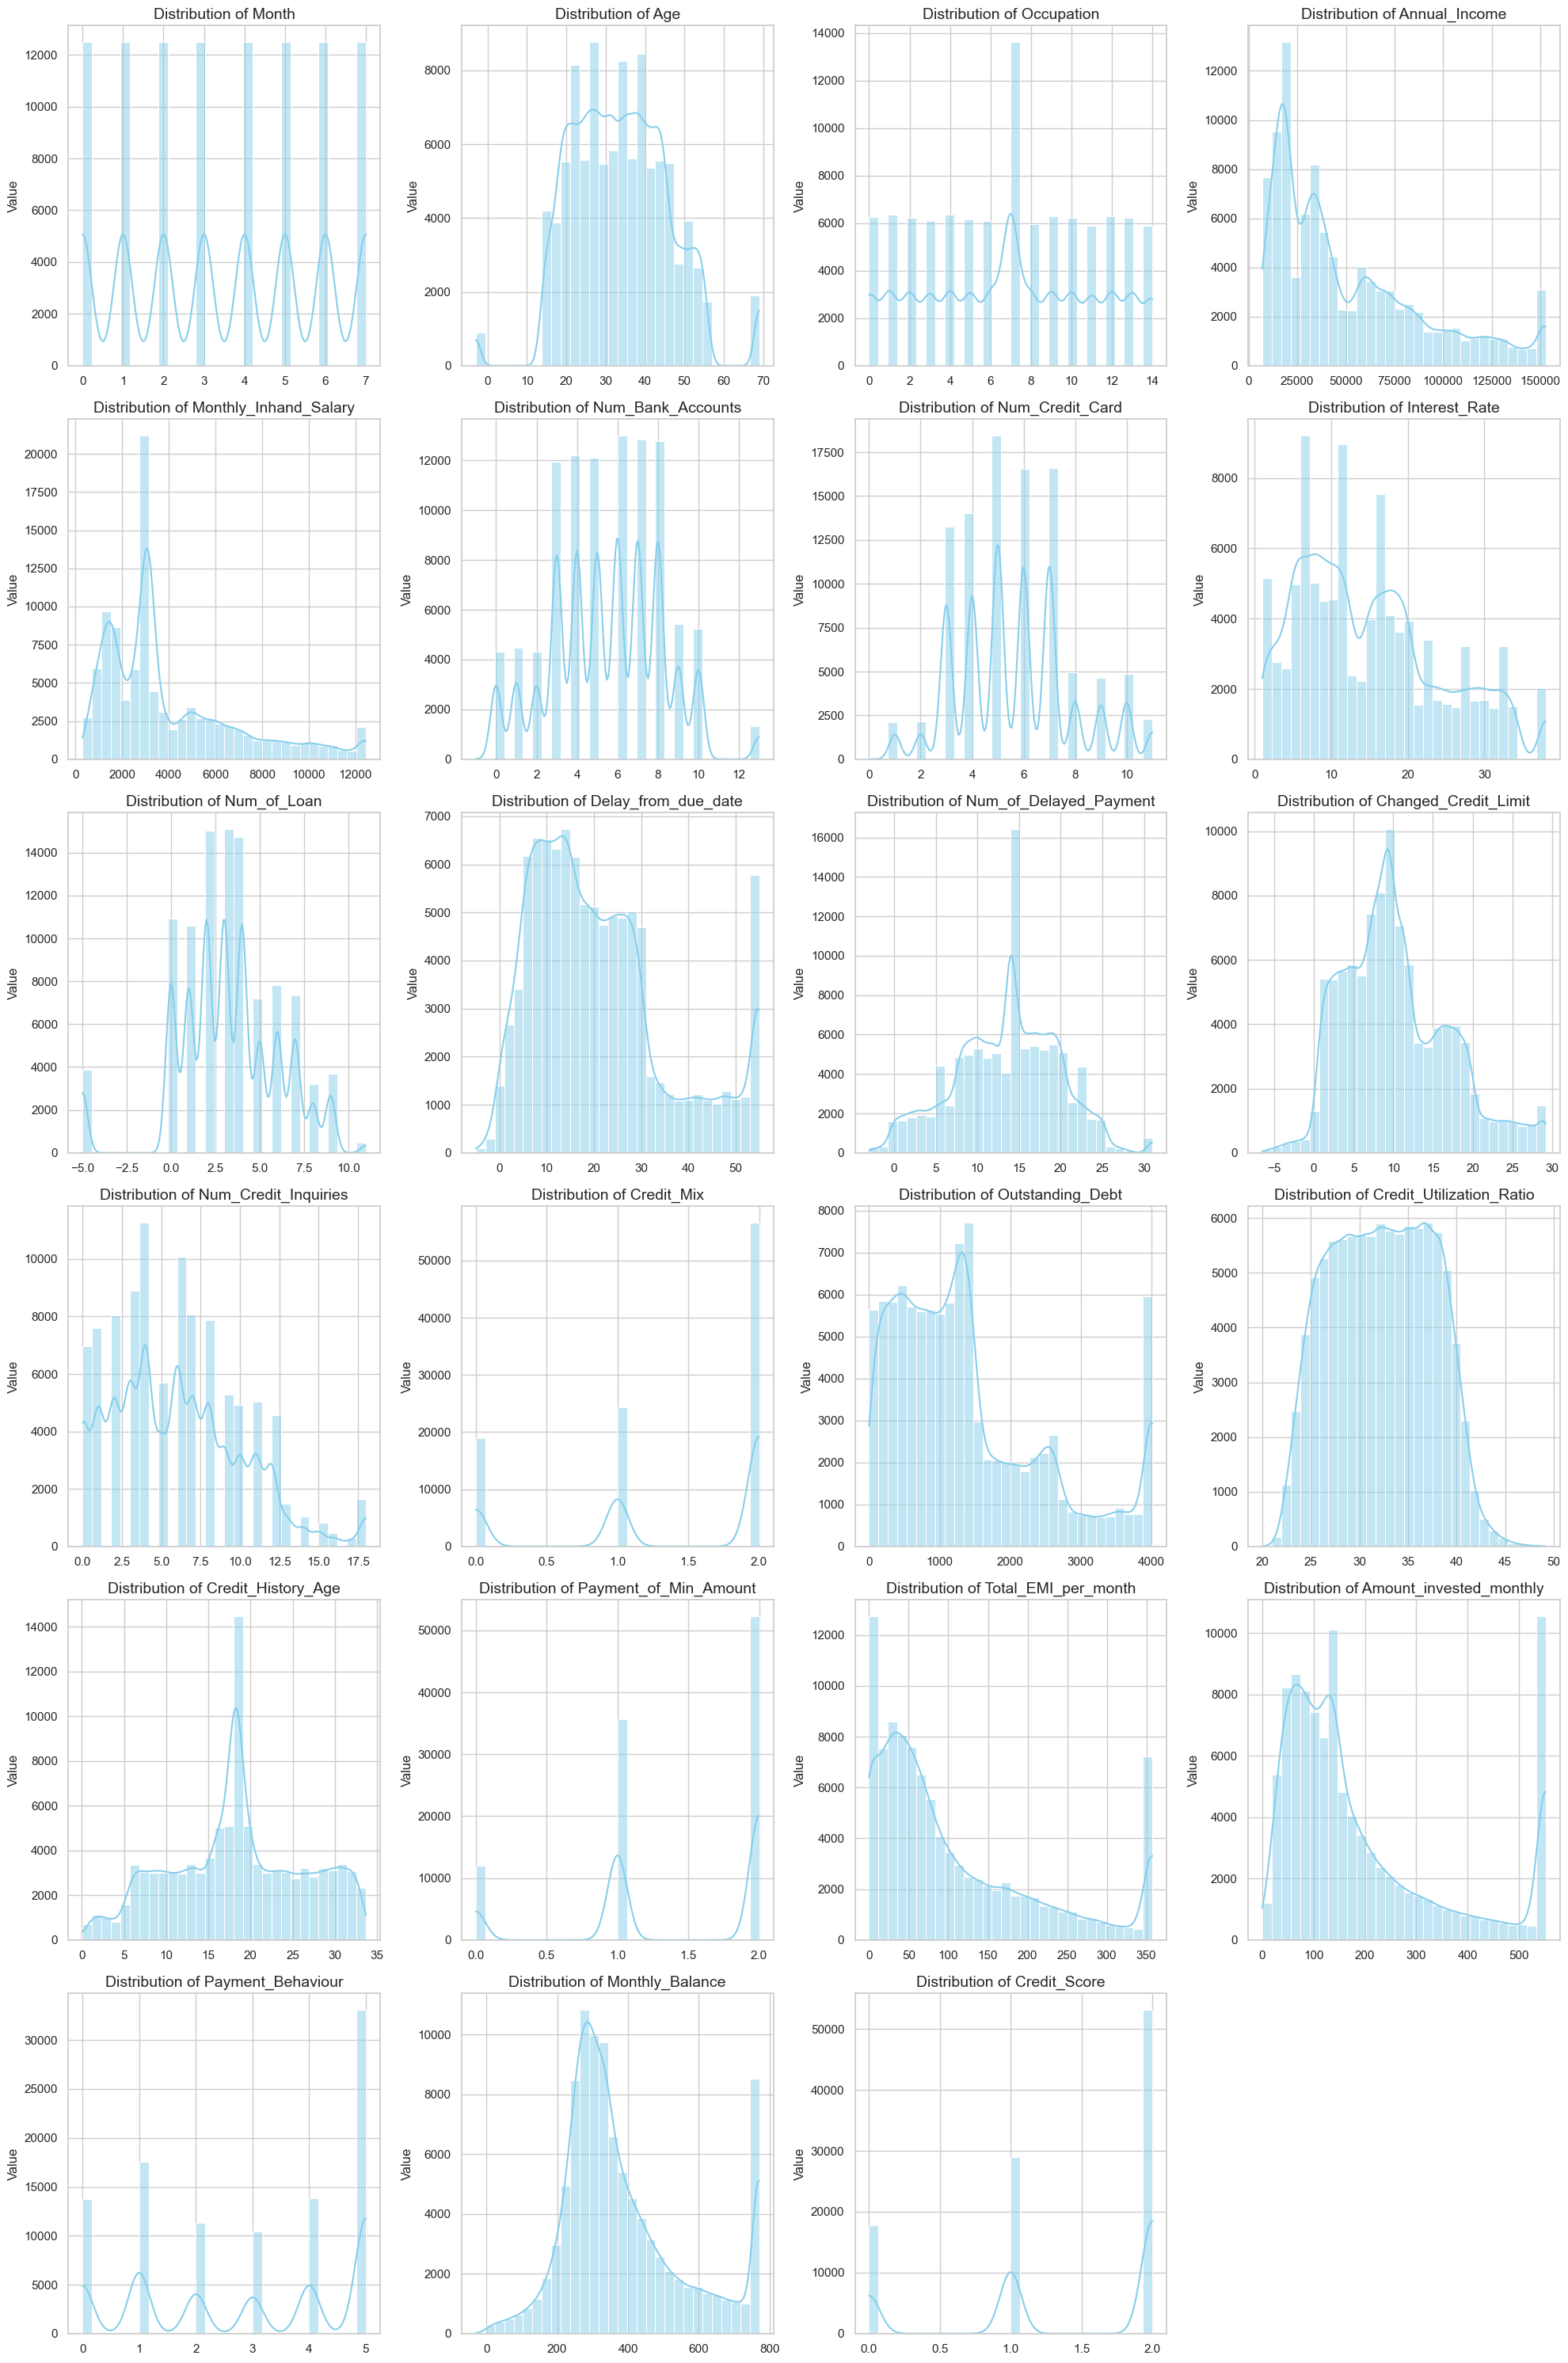

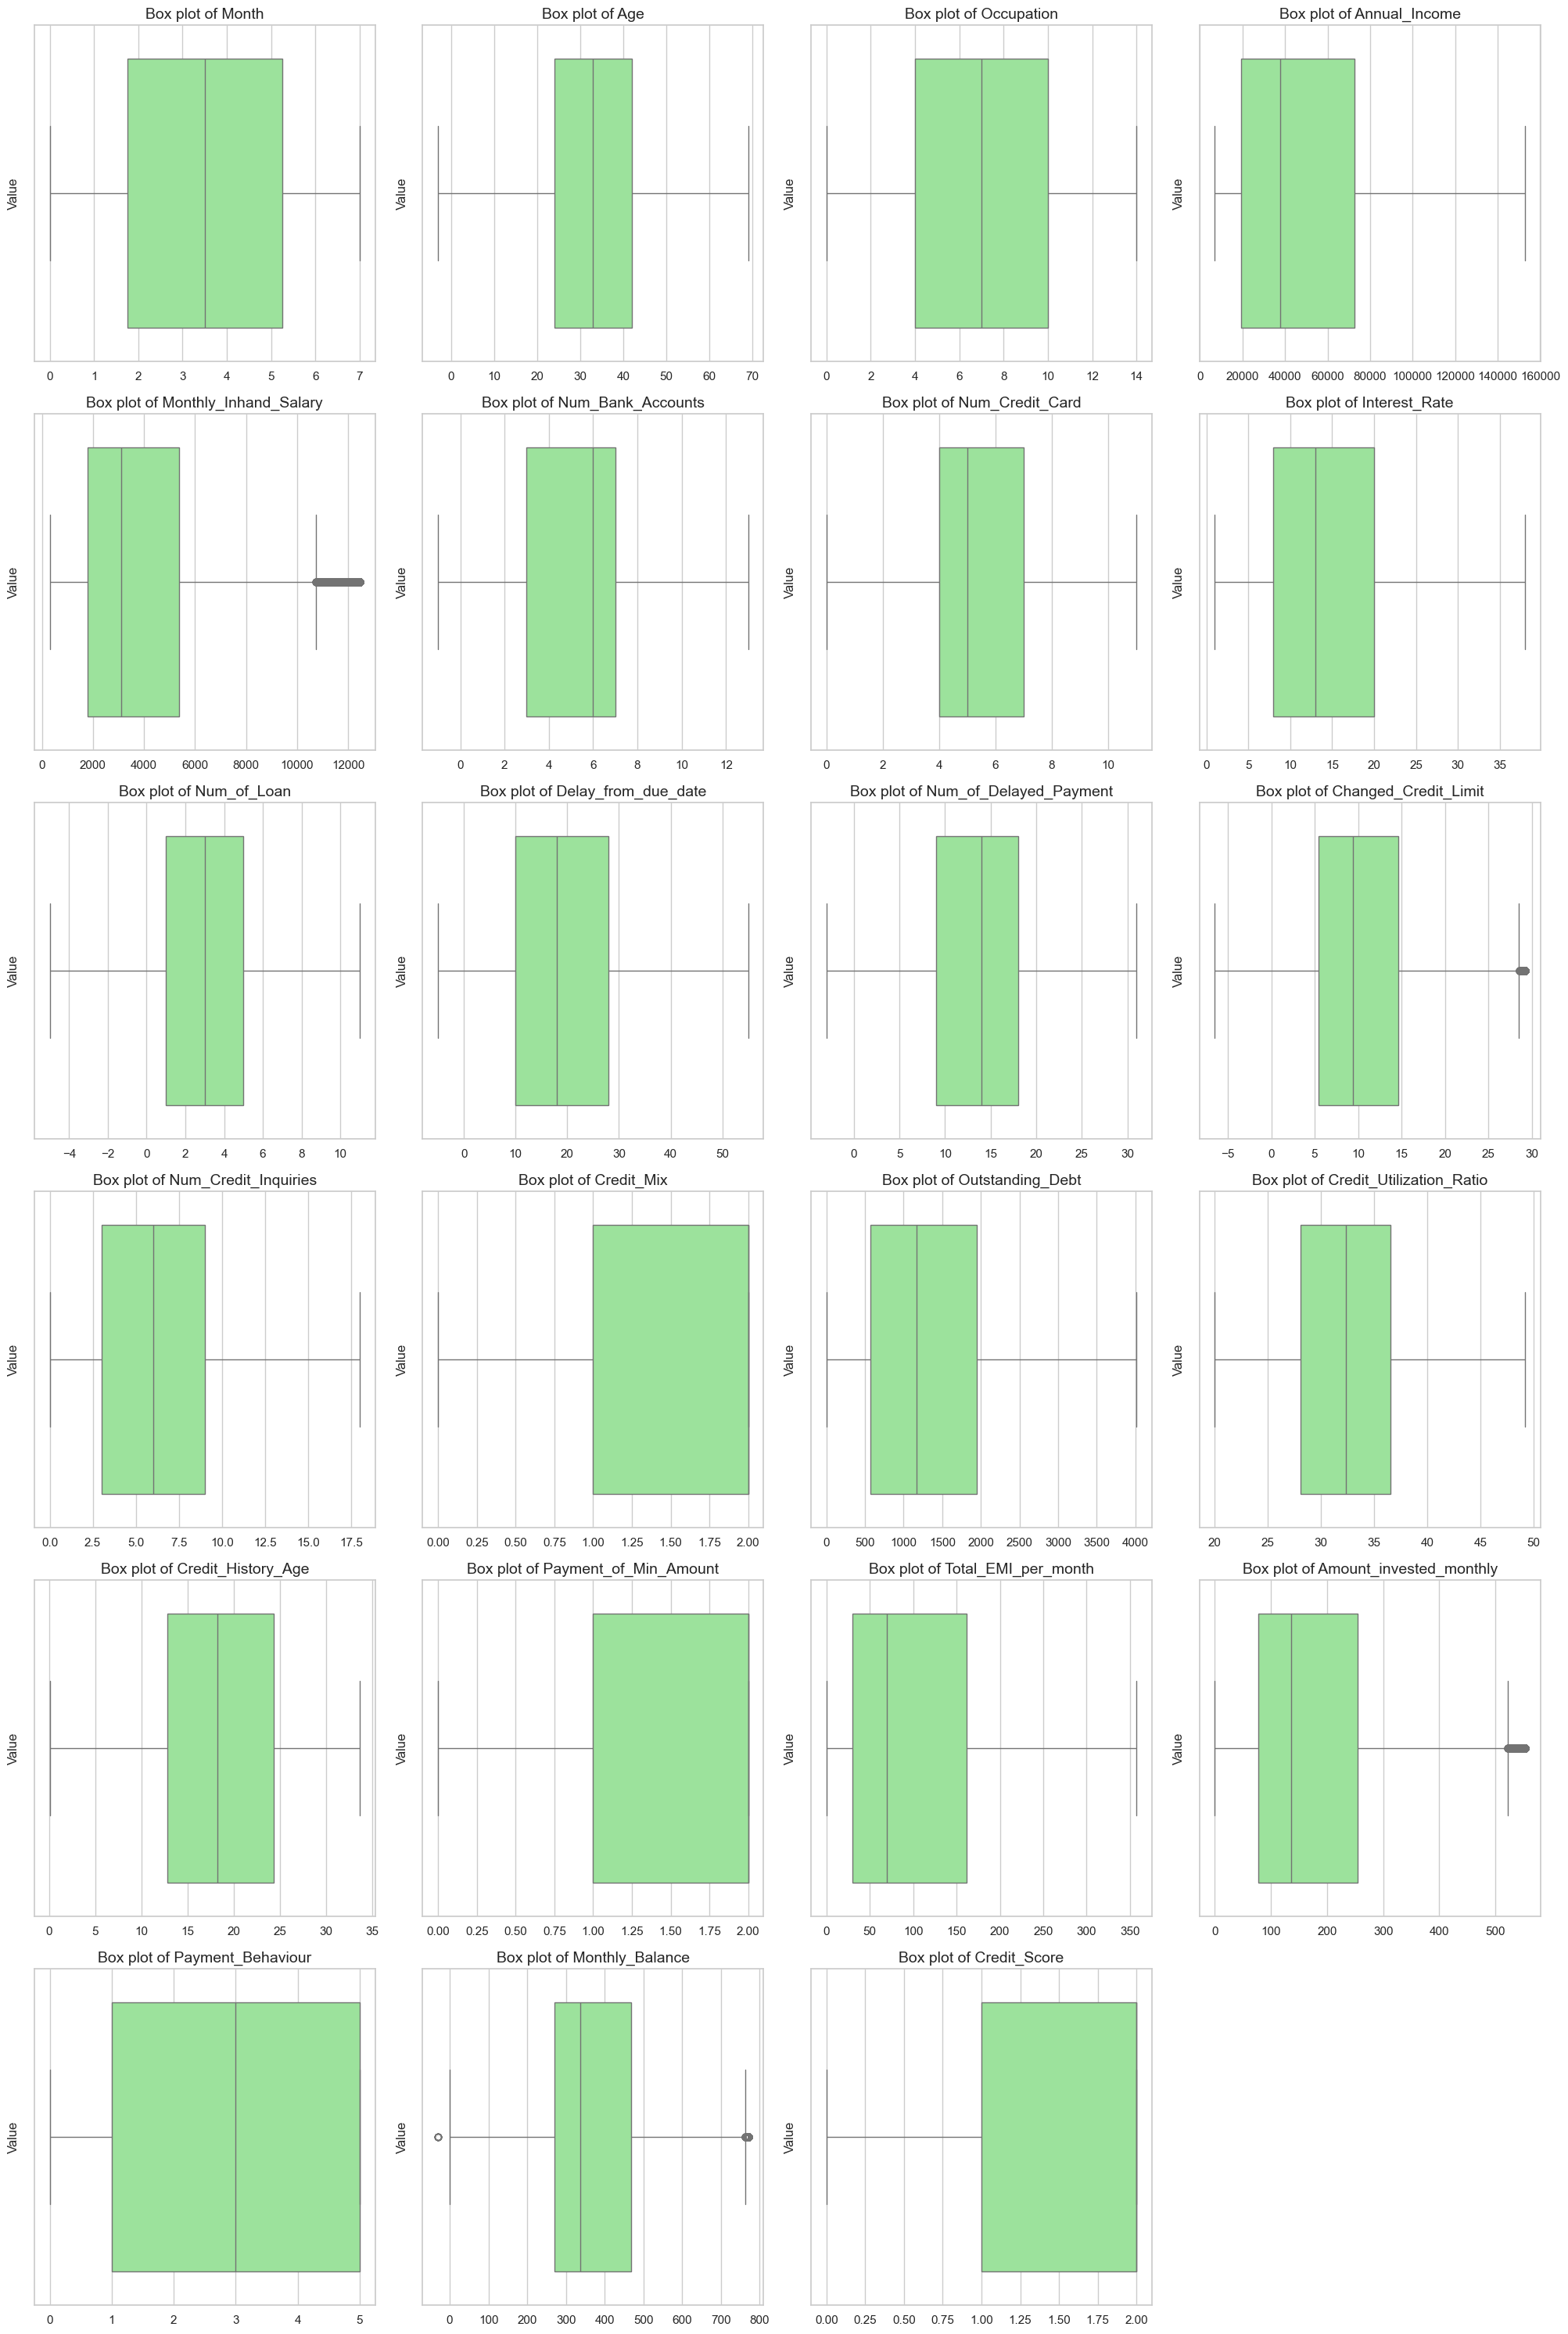

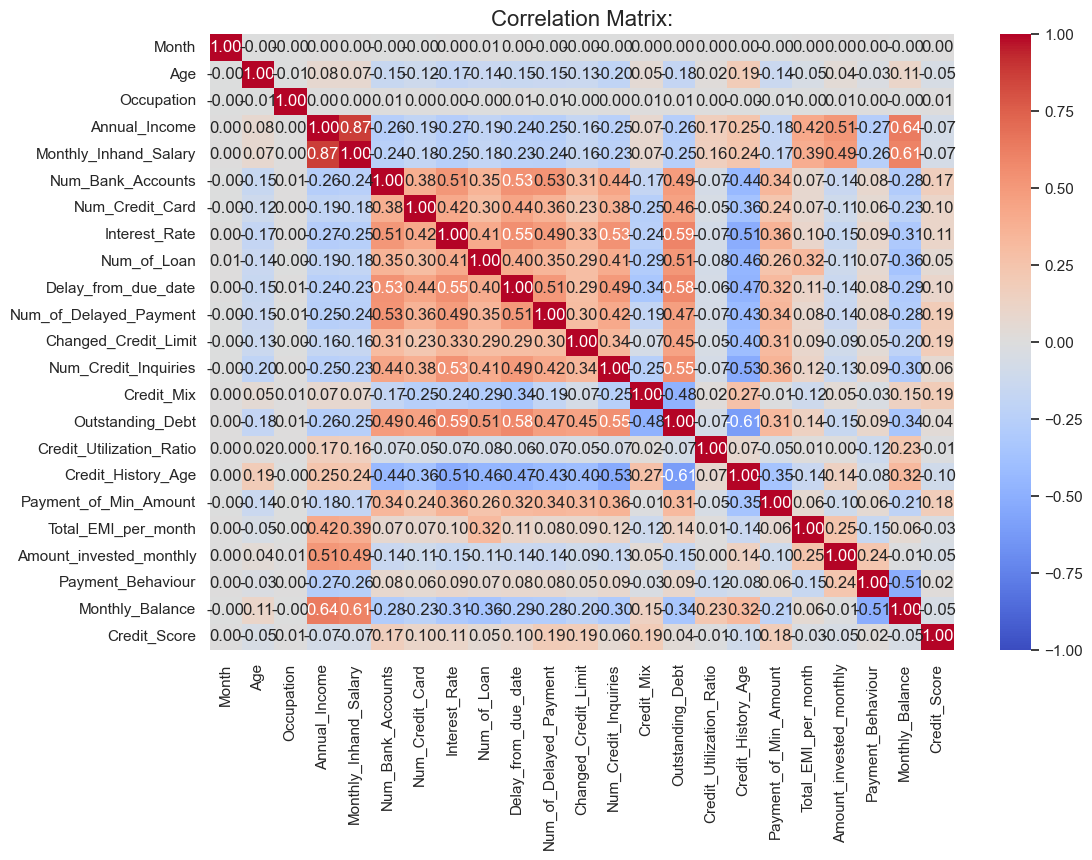

No rows to plot.


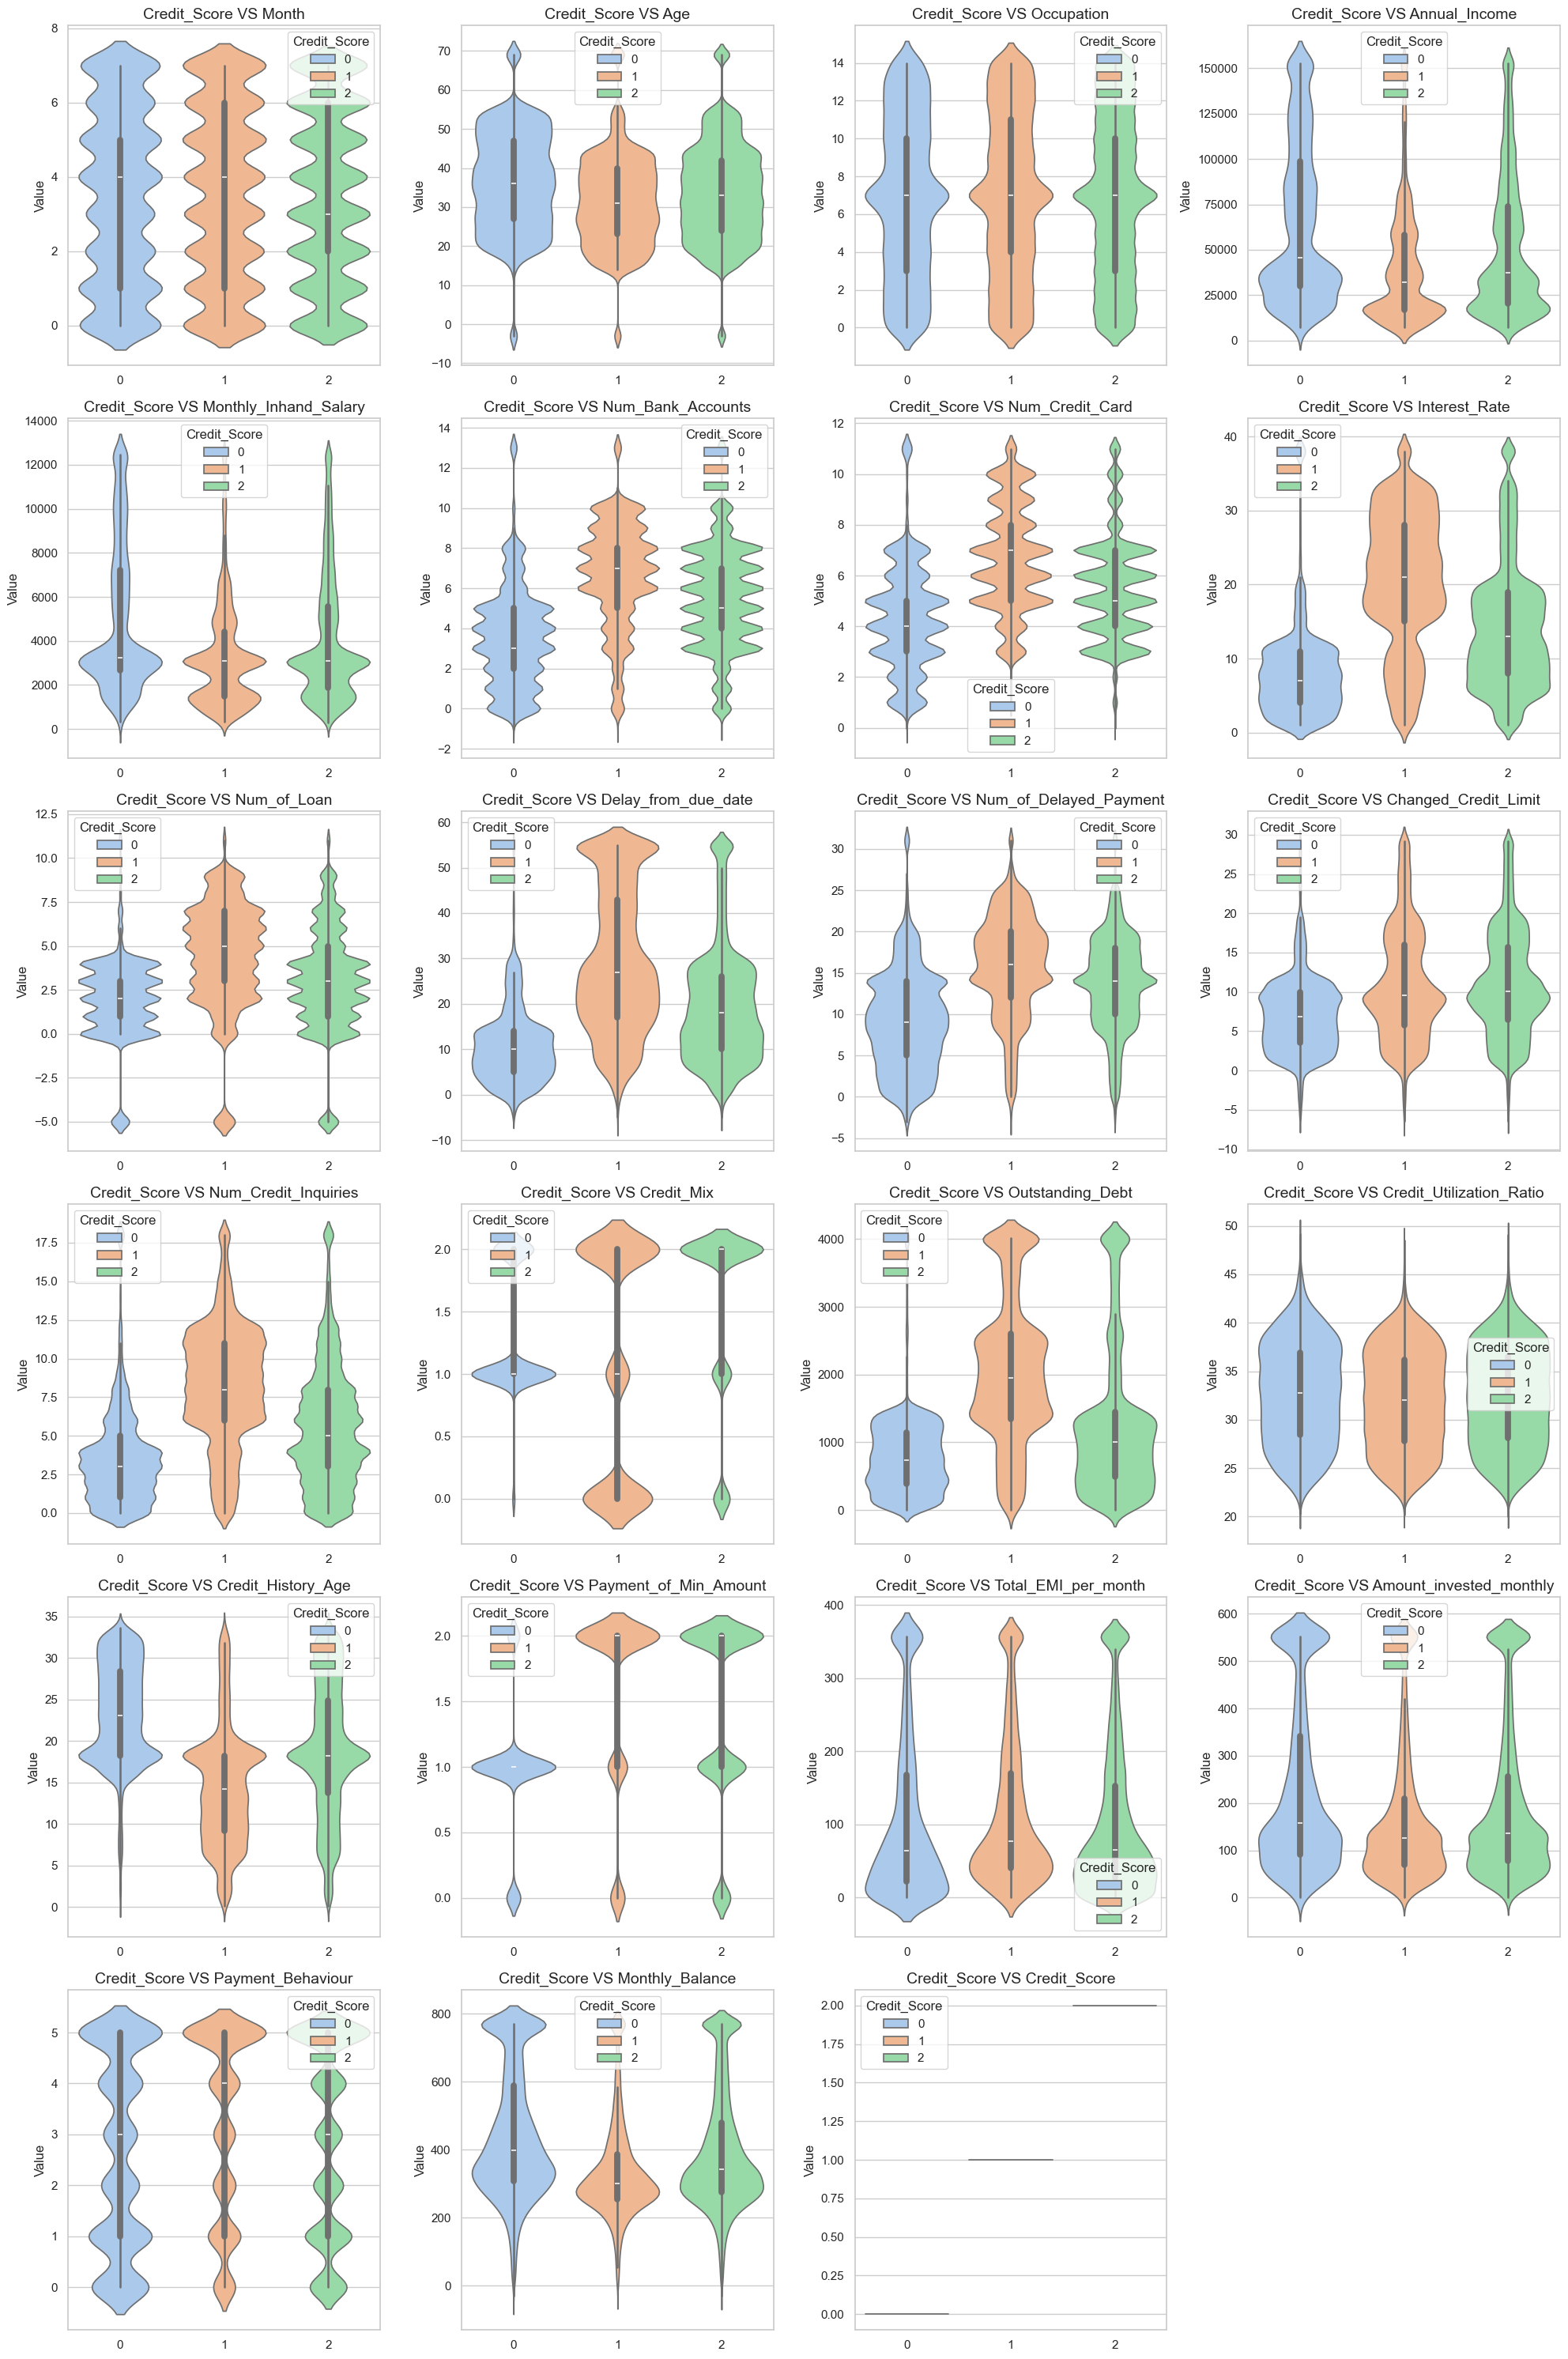

In [5]:
clean_EDA = EDA(clean_data)
clean_EDA.perform_EDA()